In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math 
from tabulate import tabulate

In [27]:
def bsm_price(St,t,T,K,r,sigma):
    dt = T-t
    if dt == 0:
        return max(0,St-K) , max(0,K-St)
        
    d1 = (math.log(St/K) + (r + 0.5 * sigma * sigma)*dt ) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma*np.sqrt(dt)
    
    phi_d1 = norm.cdf(d1)
    phi_d2 = norm.cdf(d2)

    mphi_d1 = norm.cdf(-d1)
    mphi_d2 = norm.cdf(-d2)
    
    C = St * phi_d1 - K * np.exp(-r*dt)  * phi_d2
    P = K * np.exp(-r*(dt)) * mphi_d2 - St * mphi_d1

    return C,P

    

In [29]:
St_values = [0.4, 0.6, 0.8, 1.0, 1.2]
t = 0
T = 1
K = 1
r = 0.05
sigma = 0.6

In [31]:
def sensitivity_T(T_sample, K, r, sigma):
    T_values = np.linspace(0.1, 5, num=500)
    call_list, put_list = [], []
    counter = 0
    data = []
    for St in St_values:
        call, put = [], []
        for T in T_values:
            C, P = bsm_price(St, t, T, K, r, sigma)
            call.append(C)
            put.append(P)

            if St == 0.8:
                if counter % 50 == 0:
                    data.append([1 + int(counter/50), T, C, P])
                counter += 1

        call_list.append(call)
        put_list.append(put)
    print("------------------------- Sensitivity Analysis with respect to T -------------------------\n")
    heading = ['S. No', 'T', 'C(t,St)', 'P(t,St)']
    print(tabulate(data, headers=heading))

    for idx in range(len(St_values)):
        plt.plot(T_values, call_list[idx],
                 label='x = {}'.format(St_values[idx]))
    plt.xlabel('T')
    plt.ylabel('C(t,St)')
    plt.title('Plot for C(t,St) vs T')
    plt.legend()
    plt.grid()
    plt.show()

    for idx in range(len(St_values)):
        plt.plot(T_values, put_list[idx],
                 label='St = {}'.format(St_values[idx]))

    plt.xlabel('T')
    plt.ylabel('P(t,St)')
    plt.title('Plot for P(t,St) vs T')
    plt.legend()
    plt.grid()
    plt.show()

------------------------- Sensitivity Analysis with respect to T -------------------------

  S. No         T    C(t,St)    P(t,St)
-------  --------  ---------  ---------
      1  0.1       0.0104876   0.2055
      2  0.590982  0.0897777   0.260661
      3  1.08196   0.147911    0.29525
      4  1.57295   0.195092    0.319458
      5  2.06393   0.235421    0.33737
      6  2.55491   0.270874    0.350952
      7  3.04589   0.302594    0.361329
      8  3.53687   0.331314    0.369225
      9  4.02786   0.357547    0.375138
     10  4.51884   0.381665    0.379429


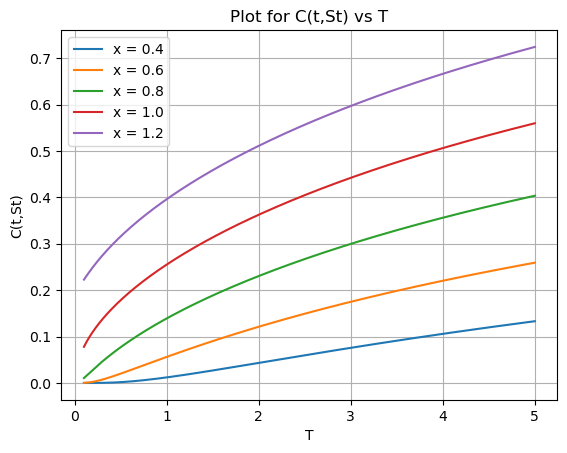

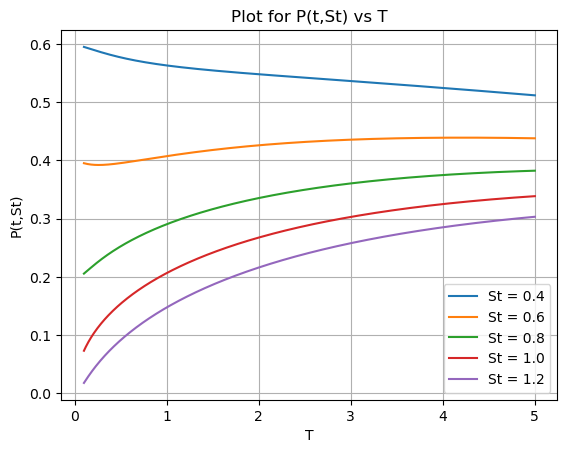

In [33]:
sensitivity_T(1, 1, 0.05, 0.6)

In [69]:
def sensitivity_K(T, K_sample, r, sigma):
    K_list = np.linspace(0.1, 2, num=500)
    call_list, put_list = [], []

    counter = 0
    data = []

    for x in St_values:
        call, put = [], []
        for K in K_list:
            C, P = bsm_price(x, t, T, K, r, sigma)
            call.append(C)
            put.append(P)

            if x == 0.8:
                if counter % 50 == 0:
                    data.append([1 + int(counter/50), K, C, P])
                counter += 1

        call_list.append(call)
        put_list.append(put)

    print("------------------------- Sensitivity Analysis with respect to K -------------------------\n")
    heading = ['S. No', 'K', 'C(t,St)', 'P(t,St)']
    print(tabulate(data, headers=heading))

    for idx in range(len(St_values)):
        plt.plot(K_list, call_list[idx], label='St = {}'.format(St_values[idx]))

    plt.xlabel('K')
    plt.ylabel('C(t,St)')
    plt.title('Plot for C(t,St) vs K')
    plt.legend()
    plt.grid()
    plt.show()

    for idx in range(len(St_values)):
        plt.plot(K_list, put_list[idx], label='St = {}'.format(St_values[idx]))

    plt.xlabel('K')
    plt.ylabel('P(t,St)')
    plt.title('Plot for P(t,St) vs K')
    plt.legend()
    plt.grid()
    plt.show()


------------------------- Sensitivity Analysis with respect to K -------------------------

  S. No         K    C(t,St)      P(t,St)
-------  --------  ---------  -----------
      1  0.1       0.704885   7.64124e-06
      2  0.290381  0.527951   0.00417013
      3  0.480762  0.376097   0.0334112
      4  0.671142  0.261841   0.100251
      5  0.861523  0.181355   0.200861
      6  1.0519    0.126098   0.3267
      7  1.24228   0.0883989  0.470096
      8  1.43267   0.0625982  0.625392
      9  1.62305   0.0448062  0.788695
     10  1.81343   0.0324182  0.957403


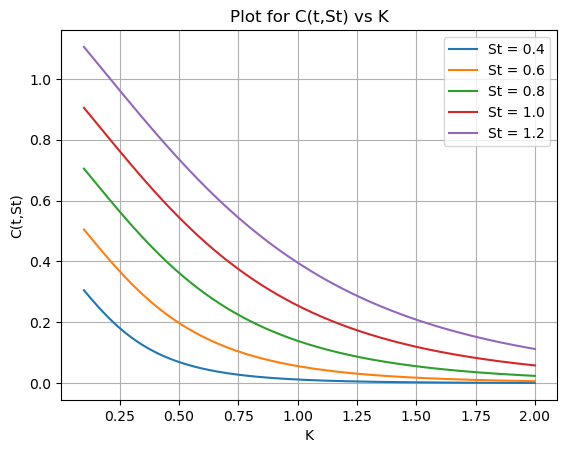

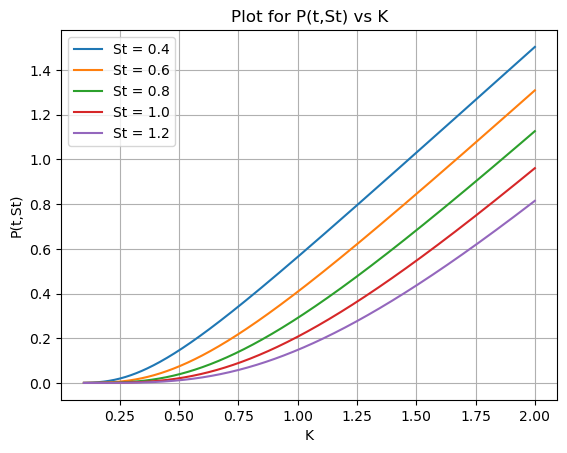

In [71]:
sensitivity_K(1, 1, 0.05, 0.6)

In [75]:
def sensitivity_r(T, K, r_sample, sigma):

    r_list = np.linspace(0, 1, num=500, endpoint=False)
    call_list, put_list = [], []

    counter = 0
    data = []

    for x in St_values:
        call, put = [], []
        for r in r_list:
            C, P = bsm_price(x, t, T, K, r, sigma)
            call.append(C)
            put.append(P)

            if x == 0.8:
                if counter % 50 == 0:
                    data.append([1 + int(counter/50), r, C, P])
                counter += 1

        call_list.append(call)
        put_list.append(put)

    print("------------------------- Sensitivity Analysis with respect to r -------------------------\n")
    heading = ['S. No', 'r', 'C(t,St)', 'P(t,St)']
    print(tabulate(data, headers=heading))

    for idx in range(len(St_values)):
        plt.plot(r_list, call_list[idx], label='St = {}'.format(St_values[idx]))

    plt.xlabel('r')
    plt.ylabel('C(t,St)')
    plt.title('Plot for C(t,St) vs r')
    plt.legend()
    plt.grid()
    plt.show()

    for idx in range(len(St_values)):
        plt.plot(r_list, put_list[idx], label='St = {}'.format(St_values[idx]))

    plt.xlabel('r')
    plt.ylabel('P(t,St)')
    plt.title('Plot for P(t,St) vs r')
    plt.legend()
    plt.grid()
    plt.show()


------------------------- Sensitivity Analysis with respect to r -------------------------

  S. No    r    C(t,St)    P(t,St)
-------  ---  ---------  ---------
      1  0     0.126249  0.326249
      2  0.1   0.152689  0.257526
      3  0.2   0.181639  0.20037
      4  0.3   0.212714  0.153533
      5  0.4   0.24544   0.11576
      6  0.5   0.279282  0.0858129
      7  0.6   0.313685  0.0624963
      8  0.7   0.348098  0.0446838
      9  0.8   0.382015  0.0313436
     10  0.9   0.414987  0.0215565


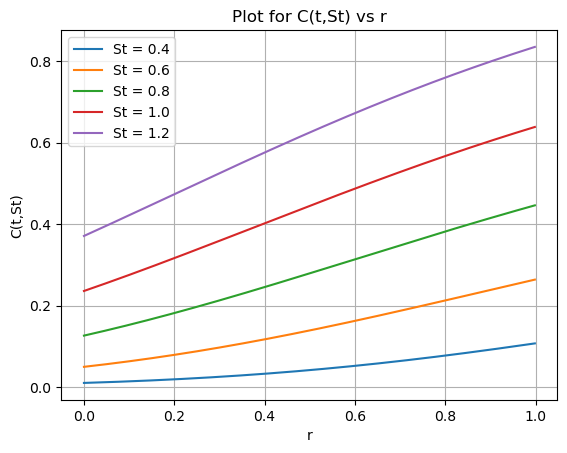

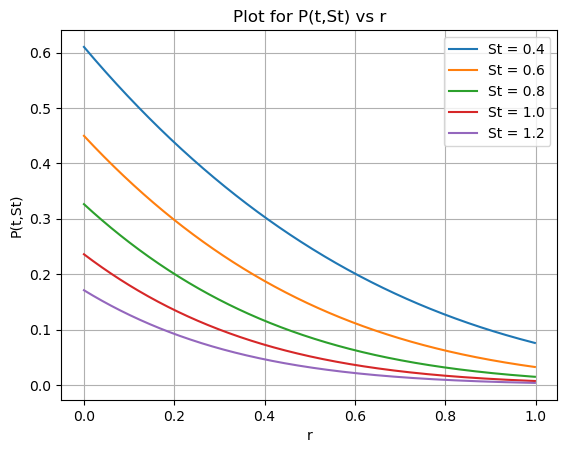

In [77]:
sensitivity_r(1, 1, 0.05, 0.6)

In [79]:
def sensitivity_sigma(T, K, r, sigma_sample):

    sigma_list = np.linspace(0.001, 1, num=500, endpoint=False)
    call_list, put_list = [], []

    counter = 0
    data = []

    for x in St_values:
        call, put = [], []
        for sigma in sigma_list:
            C, P = bsm_price(x, t, T, K, r, sigma)
            call.append(C)
            put.append(P)

            if x == 0.8:
                if counter % 50 == 0:
                    data.append([1 + int(counter/50), sigma, C, P])
                counter += 1

        call_list.append(call)
        put_list.append(put)

    heading = ['S. No', 'sigma', 'C(t,St)', 'P(t,St)']
    print(tabulate(data, headers=heading))

    for idx in range(len(St_values)):
        plt.plot(sigma_list, call_list[idx],
                 label='St = {}'.format(St_values[idx]))

    plt.xlabel('sigma')
    plt.ylabel('C(t,St)')
    plt.title('Plot for C(t,St) vs sigma')
    plt.legend()
    plt.grid()
    plt.show()

    for idx in range(len(St_values)):
        plt.plot(sigma_list, put_list[idx],
                 label='St = {}'.format(St_values[idx]))

    plt.xlabel('sigma')
    plt.ylabel('P(t,St)')
    plt.title('Plot for P(t,St) vs sigma')
    plt.legend()
    plt.grid()
    plt.show()

  S. No    sigma     C(t,St)    P(t,St)
-------  -------  ----------  ---------
      1   0.001   0            0.151229
      2   0.1009  0.00154652   0.152776
      3   0.2008  0.0187849    0.170014
      4   0.3007  0.0457362    0.196966
      5   0.4006  0.0759687    0.227198
      6   0.5005  0.10742      0.258649
      7   0.6004  0.139262     0.290492
      8   0.7003  0.171081     0.32231
      9   0.8002  0.202627     0.353856
     10   0.9001  0.233733     0.384963


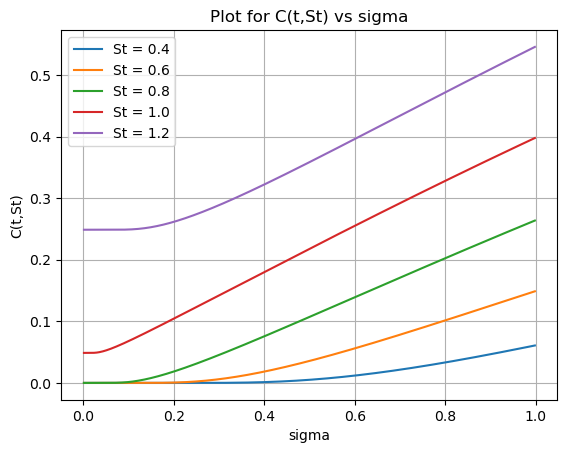

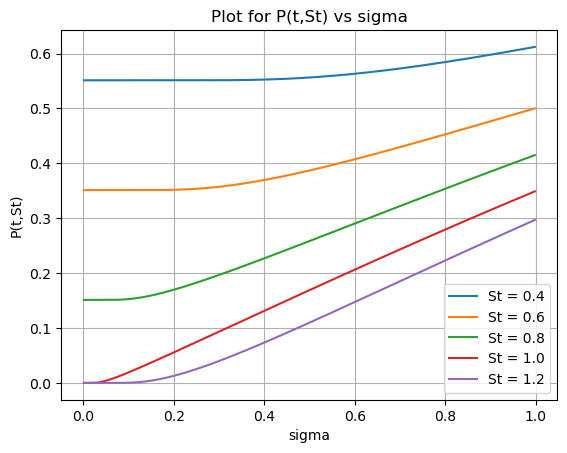

In [81]:
sensitivity_sigma(1, 1, 0.05, 0.6)

In [85]:
def sensitivity_K_and_r(x, t, T, sigma):
    call_list, put_list = [], []
    K_list = np.linspace(0.01, 2, num=100)
    r_list = np.linspace(0, 1, num=100, endpoint=False)

    K_list, r_list = np.meshgrid(K_list, r_list)
    row, col = len(K_list), len(K_list[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                x, t, T, K_list[i][j], r_list[i][j], sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, r_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs K and r')
    ax.set_xlabel("K")
    ax.set_ylabel("r")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, r_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs K and r')
    ax.set_xlabel("K")
    ax.set_ylabel("r")
    ax.set_zlabel("P(t,St)")
    plt.show()

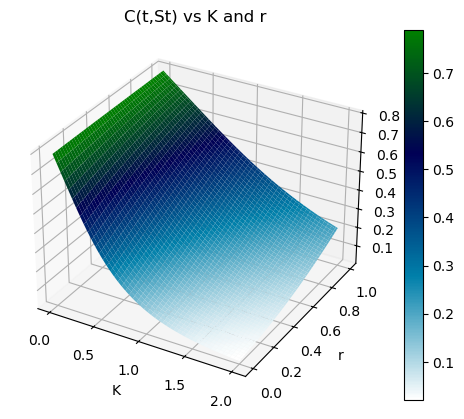

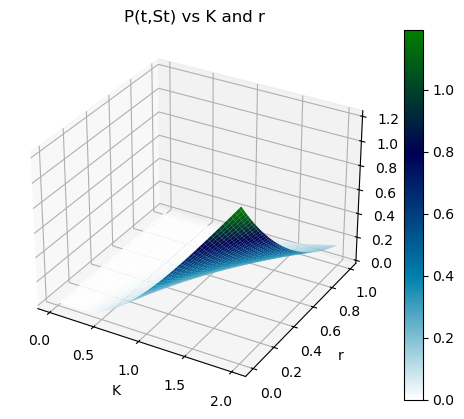

In [87]:
sensitivity_K_and_r(0.8, 0, 1, 0.6)

In [91]:
def sensitivity_K_and_sigma(x, t, T, r):
    call_list, put_list = [], []
    K_list = np.linspace(0.01, 2, num=100)
    sigma_list = np.linspace(0.01, 1, num=100, endpoint=False)

    K_list, sigma_list = np.meshgrid(K_list, sigma_list)
    row, col = len(K_list), len(K_list[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                x, t, T, K_list[i][j], r, sigma_list[i][j])
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, sigma_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs K and sigma')
    ax.set_xlabel("K")
    ax.set_ylabel("sigma")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, sigma_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs K and sigma')
    ax.set_xlabel("K")
    ax.set_ylabel("sigma")
    ax.set_zlabel("P(t,St)")
    plt.show()


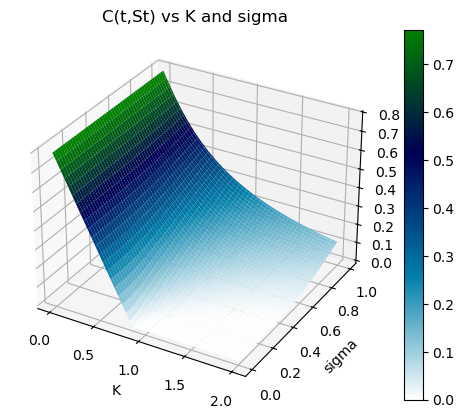

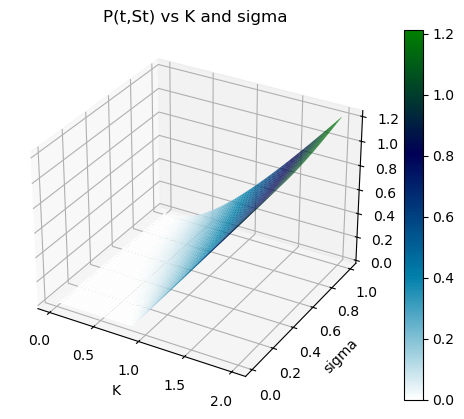

In [93]:
sensitivity_K_and_sigma(0.8, 0, 1, 0.05)

In [95]:
def sensitivity_r_and_sigma(x, t, T, K):
    call_list, put_list = [], []
    sigma_list = np.linspace(0.01, 1, num=100, endpoint=False)
    r_list = np.linspace(0.001, 1, num=100, endpoint=False)

    sigma_list, r_list = np.meshgrid(sigma_list, r_list)
    row, col = len(sigma_list), len(sigma_list[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                x, t, T, K, r_list[i][j], sigma_list[i][j])
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(sigma_list, r_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs sigma and r')
    ax.set_xlabel("sigma")
    ax.set_ylabel("r")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(sigma_list, r_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs sigma and r')
    ax.set_xlabel("sigma")
    ax.set_ylabel("r")
    ax.set_zlabel("P(t,St)")
    plt.show()


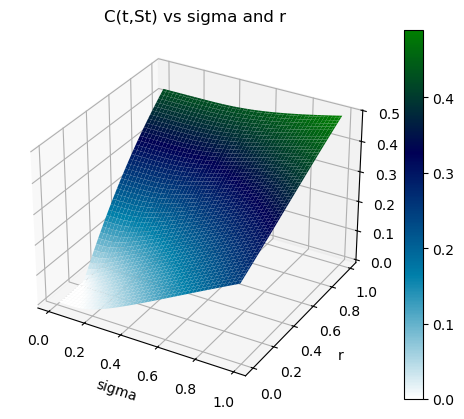

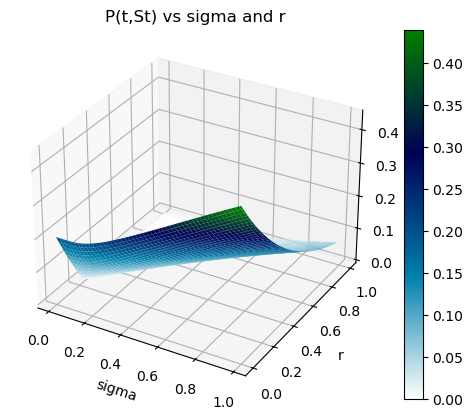

In [97]:
sensitivity_r_and_sigma(0.8, 0, 1, 1)

In [99]:
def sensitivity_T_and_K(x, t, r, sigma):
    call_list, put_list = [], []
    K_list = np.linspace(0.01, 2, num=100)
    T_values = np.linspace(0.1, 5, num=100)

    K_list, T_values = np.meshgrid(K_list, T_values)
    row, col = len(K_list), len(K_list[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                x, t, T_values[i][j], K_list[i][j], r, sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, T_values, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs K and T')
    ax.set_xlabel("K")
    ax.set_ylabel("T")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, T_values, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs K and T')
    ax.set_xlabel("K")
    ax.set_ylabel("T")
    ax.set_zlabel("P(t,St)")
    plt.show()



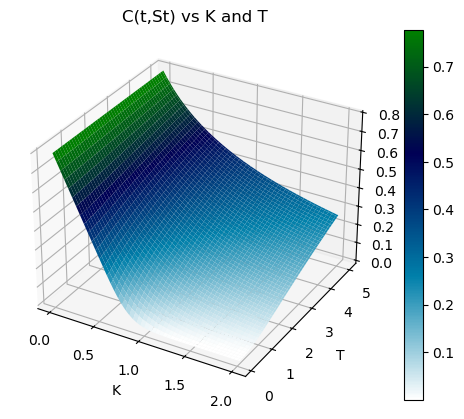

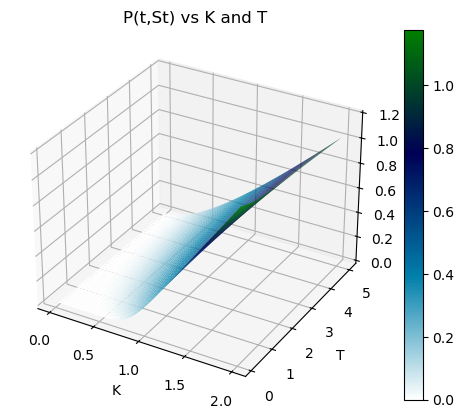

In [101]:
sensitivity_T_and_K(0.8, 0, 0.05, 0.6)

In [105]:
def sensitivity_T_and_r(x, t, K, sigma):
    call_list, put_list = [], []
    r_list = np.linspace(0.01, 1, num=100)
    T_values = np.linspace(0.1, 5, num=100)

    r_list, T_values = np.meshgrid(r_list, T_values)
    row, col = len(r_list), len(r_list[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                x, t, T_values[i][j], K, r_list[i][j], sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(T_values, r_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs T and r')
    ax.set_xlabel("T")
    ax.set_ylabel("r")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(T_values, r_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs T and r')
    ax.set_xlabel("T")
    ax.set_ylabel("r")
    ax.set_zlabel("P(t,St)")
    plt.show()


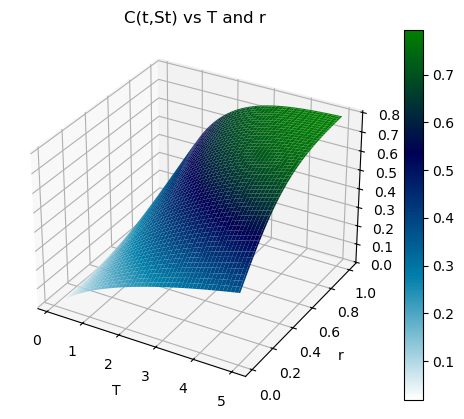

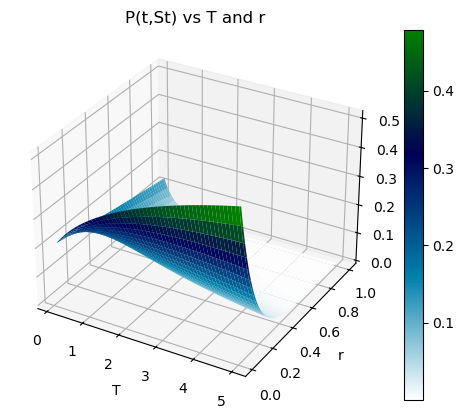

In [107]:
sensitivity_T_and_r(0.8, 0, 1, 0.6)

In [111]:
def sensitivity_T_and_sigma(x, t, K, r):
    call_list, put_list = [], []
    sigma_list = np.linspace(0.01, 1, num=100)
    T_values = np.linspace(0.1, 5, num=100)

    sigma_list, T_values = np.meshgrid(sigma_list, T_values)
    row, col = len(sigma_list), len(sigma_list[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                x, t, T_values[i][j], K, r, sigma_list[i][j])
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(T_values, sigma_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs T and sigma')
    ax.set_xlabel("T")
    ax.set_ylabel("sigma")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(T_values, sigma_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs T and sigma')
    ax.set_xlabel("T")
    ax.set_ylabel("sigma")
    ax.set_zlabel("P(t,St)")
    plt.show()



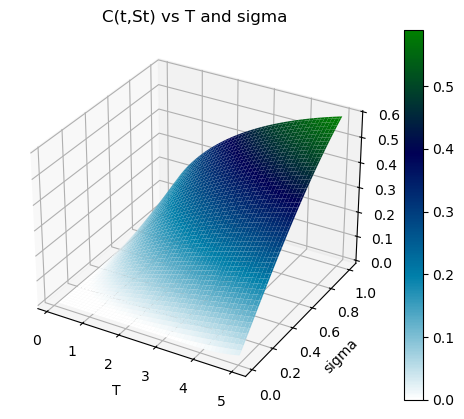

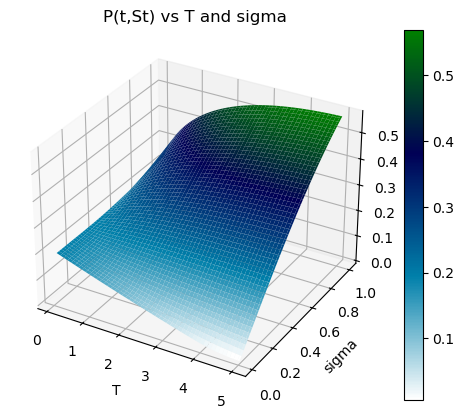

In [113]:
sensitivity_T_and_sigma(0.8, 0, 1, 0.05)

In [115]:
def sensitivity_K_and_x(t, T, r, sigma):
    call_list, put_list = [], []
    K_list = np.linspace(0.01, 2, num=100)
    St_values = np.linspace(0.2, 2, num=100)

    K_list, St_values = np.meshgrid(K_list, St_values)
    row, col = len(St_values), len(St_values[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                St_values[i][j], t, T, K_list[i][j], r, sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, St_values, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs K and St')
    ax.set_xlabel("K")
    ax.set_ylabel("St")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(K_list, St_values, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs K and St')
    ax.set_xlabel("K")
    ax.set_ylabel("St")
    ax.set_zlabel("P(t,St)")
    plt.show()



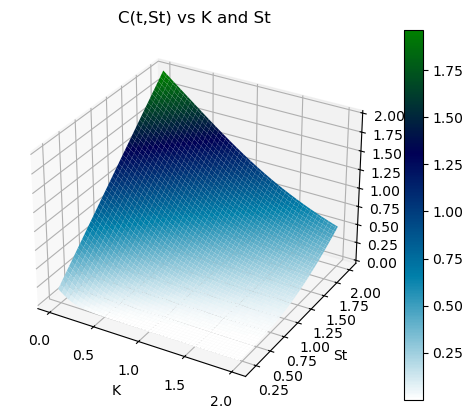

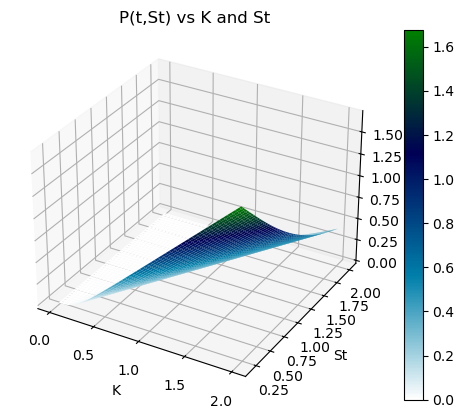

In [117]:
sensitivity_K_and_x(0, 1, 0.05, 0.6)

In [123]:
def sensitivity_T_and_x(t, K, r, sigma):
    call_list, put_list = [], []
    St_values = np.linspace(0.2, 2, num=100)
    T_values = np.linspace(0.1, 5, num=100)

    St_values, T_values = np.meshgrid(St_values, T_values)
    row, col = len(St_values), len(St_values[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                St_values[i][j], t, T_values[i][j], K, r, sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(T_values, St_values, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs T and St')
    ax.set_xlabel("T")
    ax.set_ylabel("St")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(T_values, St_values, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs T and St')
    ax.set_xlabel("T")
    ax.set_ylabel("St")
    ax.set_zlabel("P(t,St)")
    plt.show()


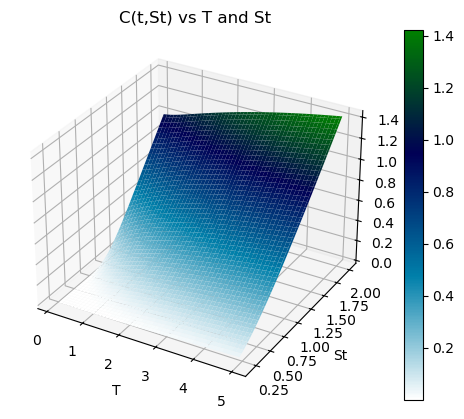

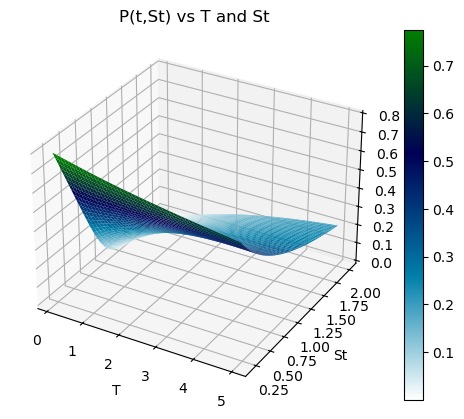

In [125]:
sensitivity_T_and_x(0, 1, 0.05, 0.6)

In [127]:
def sensitivity_x_and_r(t, K, T, sigma):
    call_list, put_list = [], []
    St_values = np.linspace(0.2, 2, num=100)
    r_list = np.linspace(0.01, 1, num=100)

    St_values, r_list = np.meshgrid(St_values, r_list)
    row, col = len(St_values), len(St_values[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                St_values[i][j], t, T, K, r_list[i][j], sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(St_values, r_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs St and r')
    ax.set_xlabel("St")
    ax.set_ylabel("r")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(St_values, r_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs St and r')
    ax.set_xlabel("St")
    ax.set_ylabel("r")
    ax.set_zlabel("P(t,St)")
    plt.show()

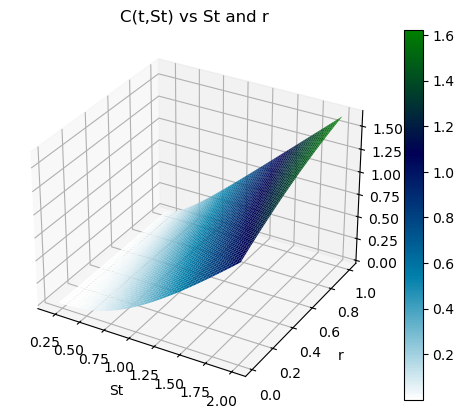

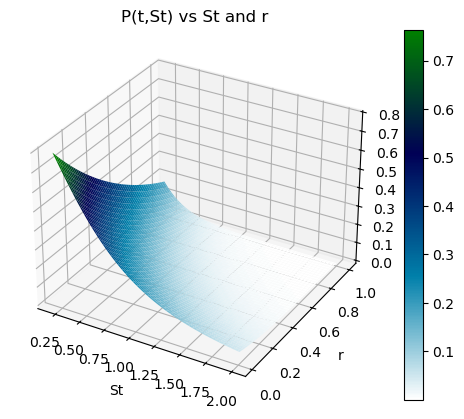

In [129]:
sensitivity_x_and_r(0, 1, 1, 0.6)

In [139]:
def sensitivity_x_and_r(t, K, T, sigma):
    call_list, put_list = [], []
    St_values = np.linspace(0.2, 2, num=100)
    r_list = np.linspace(0.01, 1, num=100)

    St_values, r_list = np.meshgrid(St_values, r_list)
    row, col = len(St_values), len(St_values[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                St_values[i][j], t, T, K, r_list[i][j], sigma)
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(St_values, r_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs St and r')
    ax.set_xlabel("St")
    ax.set_ylabel("r")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(St_values, r_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs St and r')
    ax.set_xlabel("St")
    ax.set_ylabel("r")
    ax.set_zlabel("P(t,St)")
    plt.show()


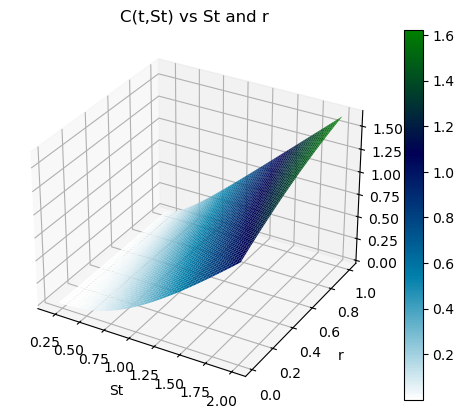

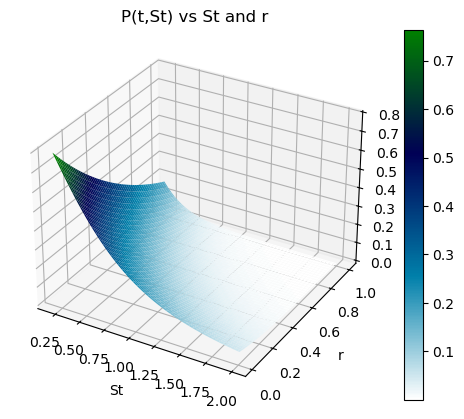

In [141]:
sensitivity_x_and_r(0, 1, 1, 0.6)

In [143]:
def sensitivity_x_and_sigma(t, K, T, r):
    call_list, put_list = [], []
    St_values = np.linspace(0.2, 2, num=100)
    sigma_list = np.linspace(0.01, 1, num=100)

    St_values, sigma_list = np.meshgrid(St_values, sigma_list)
    row, col = len(St_values), len(St_values[0])

    for i in range(row):
        call_list.append([])
        put_list.append([])

        for j in range(col):
            C, P = bsm_price(
                St_values[i][j], t, T, K, r, sigma_list[i][j])
            call_list[i].append(C)
            put_list[i].append(P)

    call_list = np.array(call_list)
    put_list = np.array(put_list)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(St_values, sigma_list, call_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('C(t,St) vs St and sigma')
    ax.set_xlabel("St")
    ax.set_ylabel("sigma")
    ax.set_zlabel("C(t,St)")
    plt.show()

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(St_values, sigma_list, put_list, cmap='ocean_r')
    fig.colorbar(surf)
    plt.title('P(t,St) vs St and sigma')
    ax.set_xlabel("St")
    ax.set_ylabel("sigma")
    ax.set_zlabel("P(t,St)")
    plt.show()

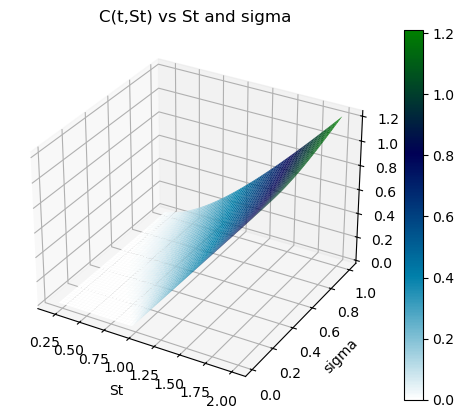

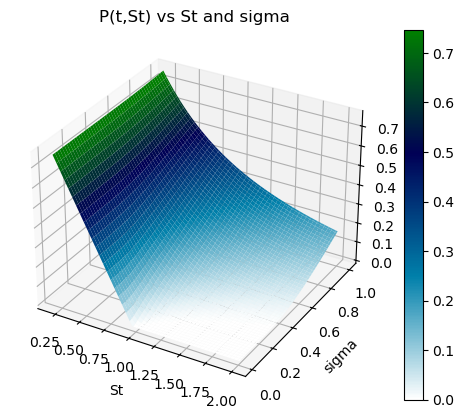

In [145]:
sensitivity_x_and_sigma(0, 1, 1, 0.05)